In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import math
import pandas as pd
from copy import deepcopy

pd.set_option("display.precision", 3)

In [2]:
def f(x):
    k = 1
    m = 2
    return -k * x * math.sin(m*(x-1))
f = np.vectorize(f)
a = -3 * math.pi + 1
b = 2 * math.pi + 1
x_space = np.linspace(a, b, 1000)

In [3]:
def plot(space, *functions, points=None, title=None):
    plt.rcParams['figure.figsize'] = [9, 6]

    if points != None:
        plt.scatter(points[0], points[1], label="nodes")
    for foo, lbl, line in functions:
        plt.plot(space, foo(space), line, label=lbl)

    if title:
        plt.title(title, y=-0.12)

    plt.legend(bbox_to_anchor=(0.85, 0.23), loc='upper left', borderaxespad=0)
    plt.grid()
    plt.show()

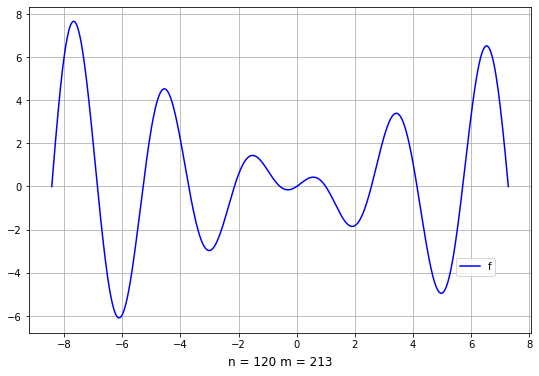

In [4]:
plot(x_space, [f, 'f', 'b-'], title="n = 120 m = 213")

In [5]:
def get_norm(y1, y2, mode):
    n = len(y1)
    if mode == 'max':
        return max([abs(y1[i] - y2[i]) for i in range(n)])
    elif mode == 'sse':
        return sum([(y1[i] - y2[i])**2 for i in range(n)])

In [6]:
class TrigonometricApproximation:
    def __init__(self, m, xs, ys, start, end):
        self.__m = m
        self.__n = len(xs)
        self.__xs = xs
        self.__ys = ys
        self.range_start = start
        self.range_end = end
        self.rng_len = end - start
        self.__a = np.zeros(self.__m + 1)
        self.__b = np.zeros(self.__m + 1)
        self.__scale_xs_to_2pi()
        self.__fill_a_b()
        self.__scale_xs_from_2pi()
    
    
    def __scale_xs_to_2pi(self):
        for i in range(self.__n):
            self.__xs[i] = self.__scale_to_2pi(self.__xs[i])

    def __scale_xs_from_2pi(self):
        for i in range(self.__n):
            self.__xs[i] = self.__scale_from_2pi(self.__xs[i])

    #     Scales value to a range from -pi to pi
    def __scale_to_2pi(self, x):
        x /= self.rng_len
        x *= 2 * math.pi
        x += -math.pi - (self.range_start / self.rng_len * 2 * math.pi)
        return x

    def __scale_from_2pi(self, x):
        x -= -math.pi - (self.range_start / self.rng_len * 2 * math.pi)
        x /= 2 * math.pi
        x *= self.rng_len
        return x

    def __calc_aj(self, j: int) -> float:
        aj = 0.0
        for i in range(self.__n):
            aj += self.__ys[i] * math.cos(j * self.__xs[i])
        return 2 * aj / self.__n

    def __calc_bj(self, j: int) -> float:
        bj = 0.0
        for i in range(self.__n):
            bj += self.__ys[i] * math.sin(j * self.__xs[i])
        return 2 * bj / self.__n

    def __fill_a_b(self):
        for j in range(self.__m + 1):
            self.__a[j] = 2 * sum(self.__ys[i] * np.cos(j * self.__xs[i]) for i in range(self.__n)) / self.__n
            self.__b[j] = 2 * sum(self.__ys[i] * np.sin(j * self.__xs[i]) for i in range(self.__n)) / self.__n
       
    def approximate(self, argX):
        x = deepcopy(argX)
        x = self.__scale_to_2pi(x)
        return (self.__a[0] * 0.5) + sum(
            [self.__a[j] * np.cos(j * x) + self.__b[j] * np.sin(j * x) for j in range(1, self.__m+1)]
        )


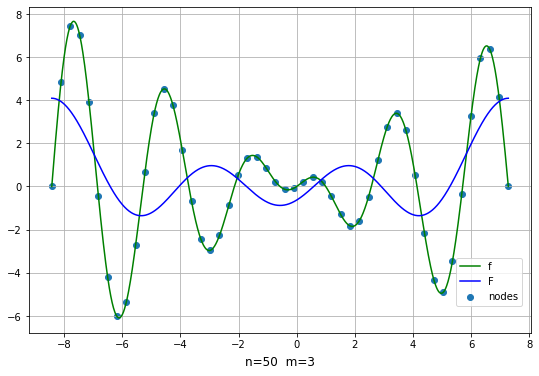

In [7]:
n = 50
xs = np.linspace(a, b, n)
ys = f(xs)
m = 3

ta = TrigonometricApproximation(m, xs, ys, a, b)
F = ta.approximate


plot(x_space, [f, "f", "g-"], [F, "F", "b-"], points=[xs, f(xs)], title=f"n={n}  m={m}")

In [8]:
res = [['Liczba węzłów', "stopień wielomianu", 'sse', 'max']]

In [9]:
def save(filename, results):
    filename += '.xlsx'
    df = pd.DataFrame(data=results)
    print(df)
    df.to_csv(filename, index=False, header=False)
    return df

In [10]:
def update_df():
    r = [n, m]
    r.append(get_norm(F(x_space), f(x_space), "sse"))
    r.append(get_norm(F(x_space), f(x_space), "max"))
    res.append(r)

In [11]:
res = []

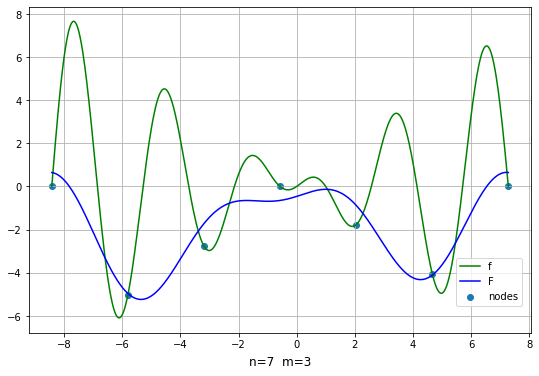

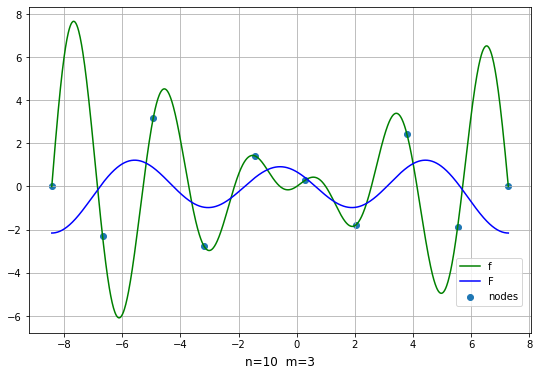

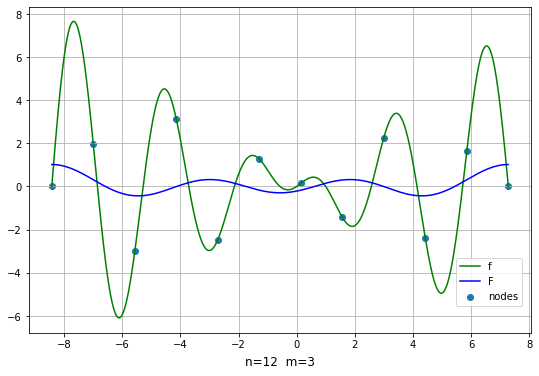

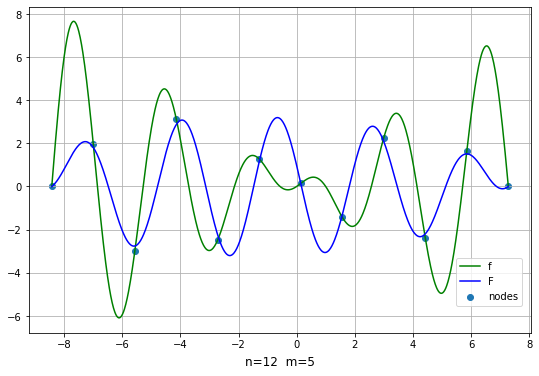

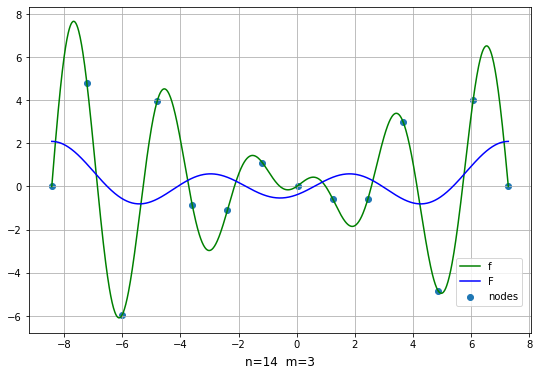

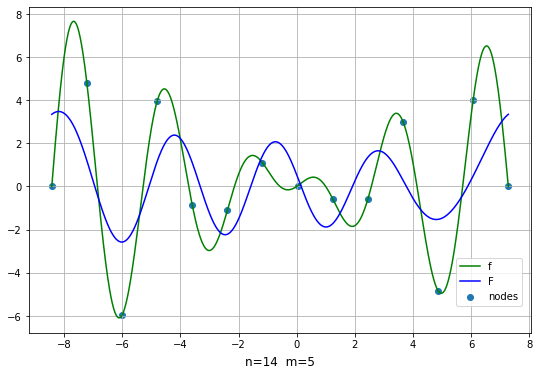

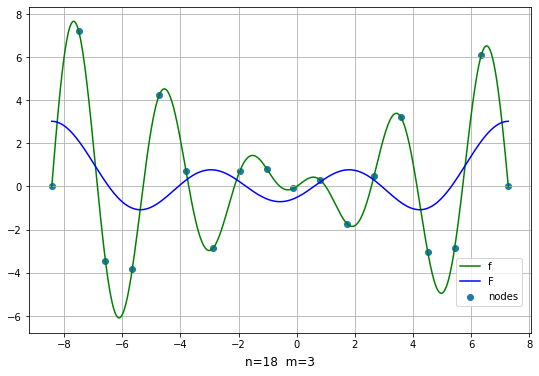

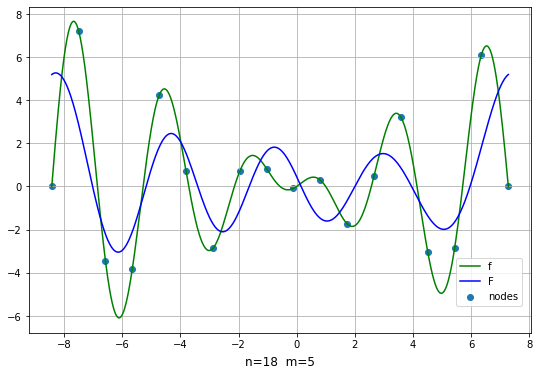

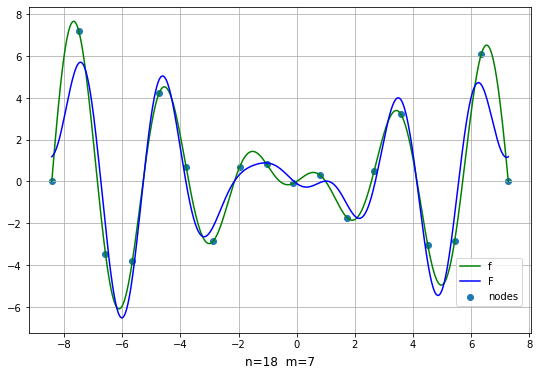

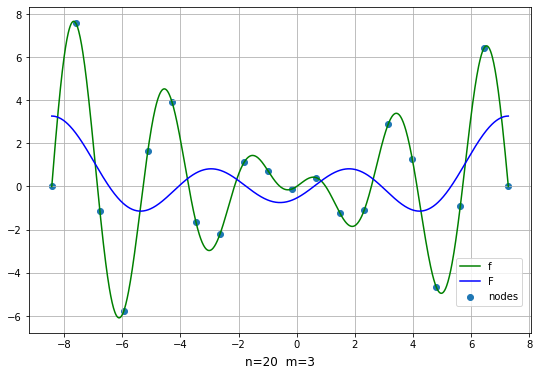

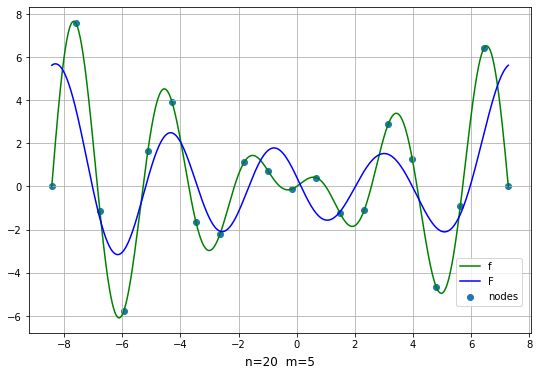

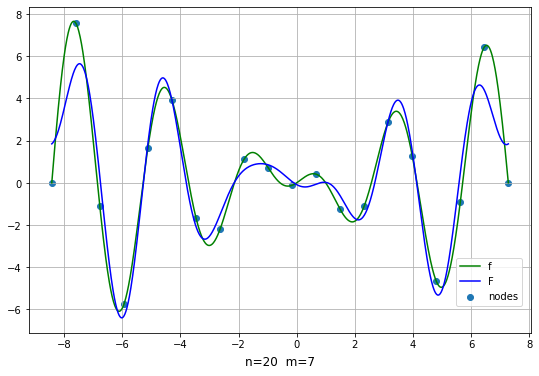

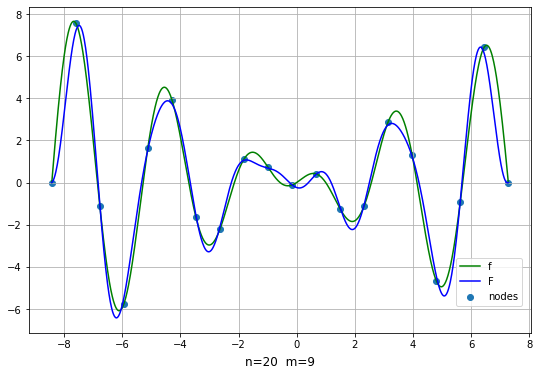

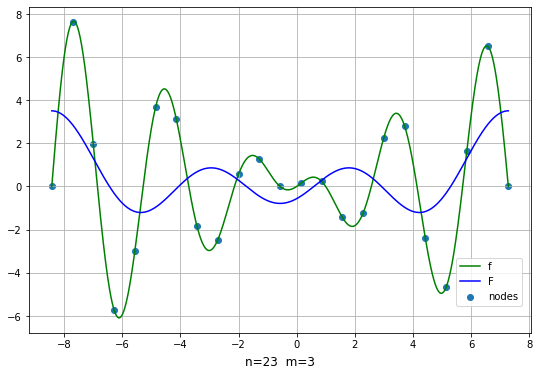

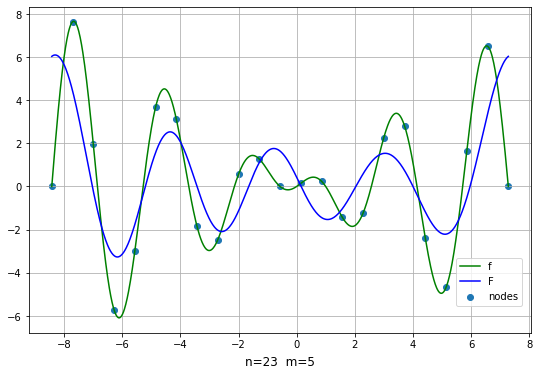

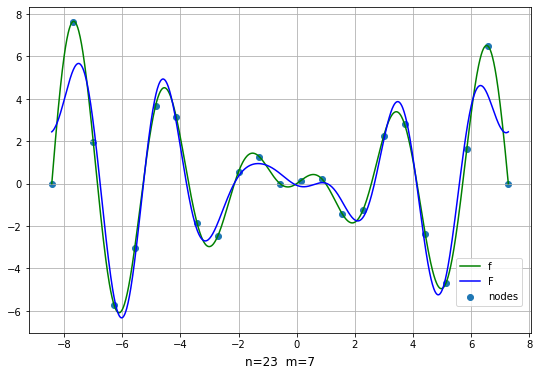

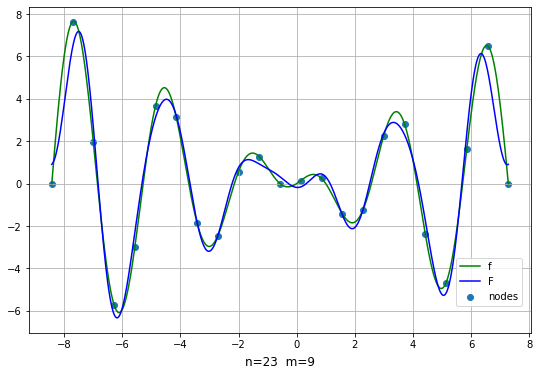

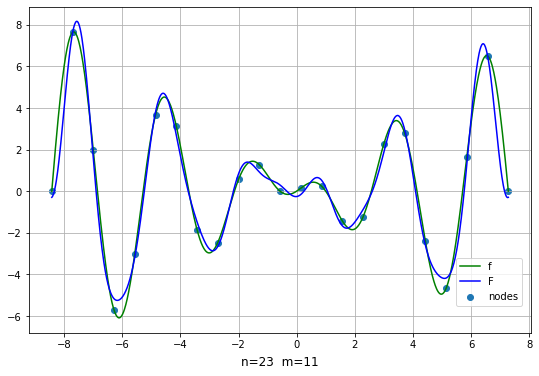

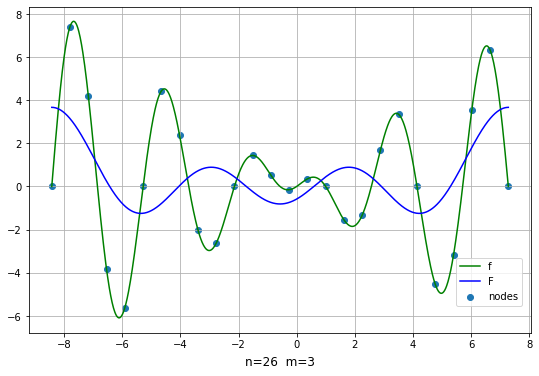

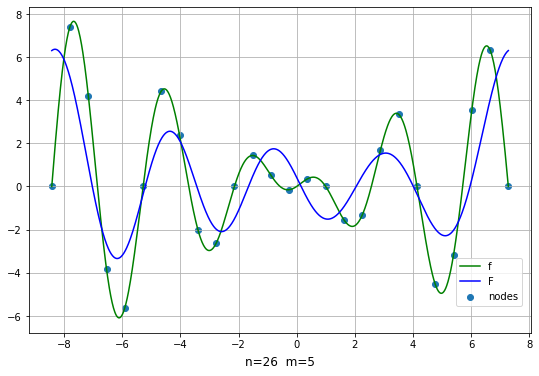

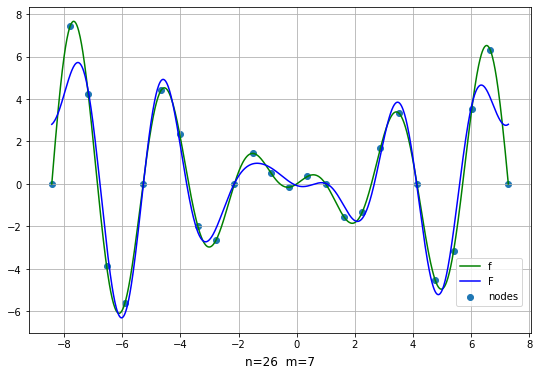

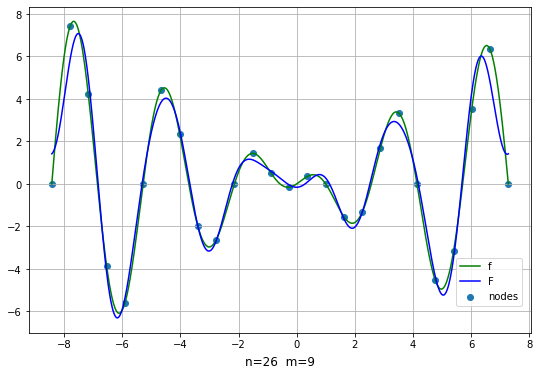

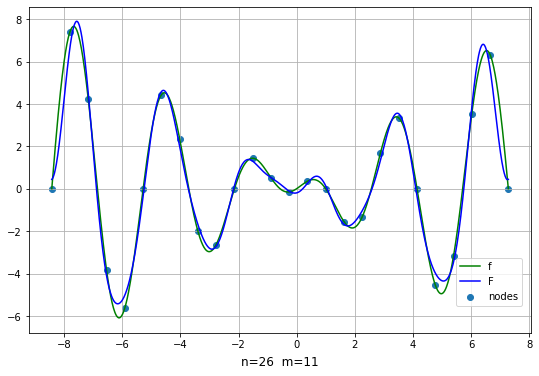

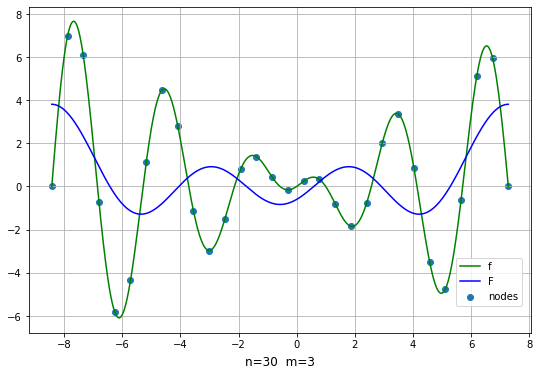

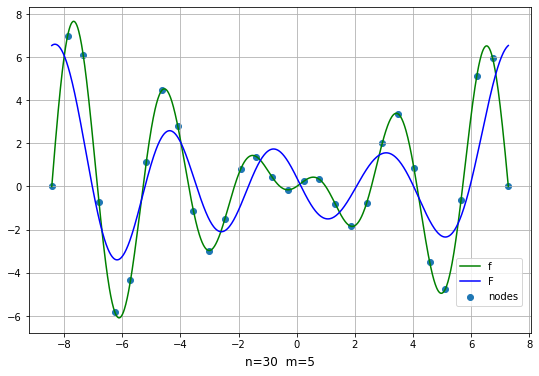

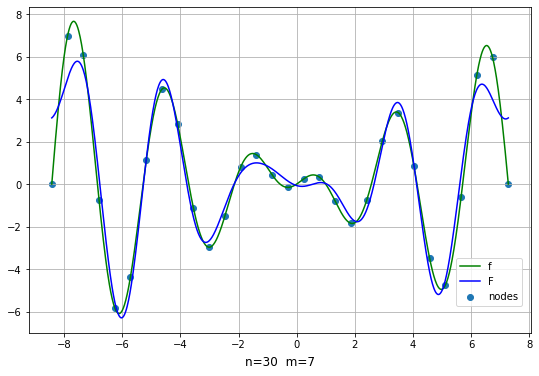

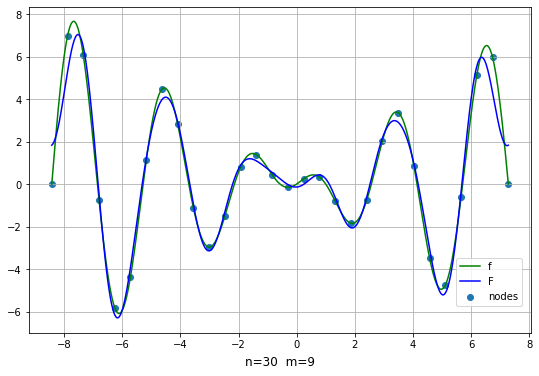

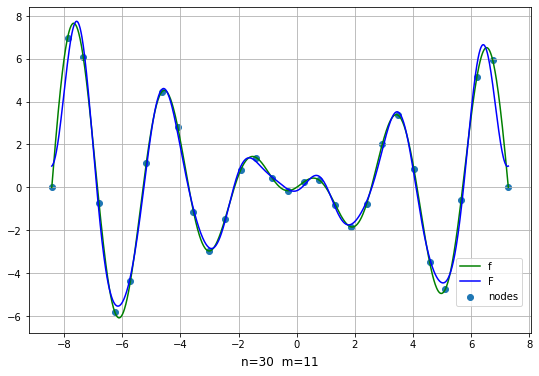

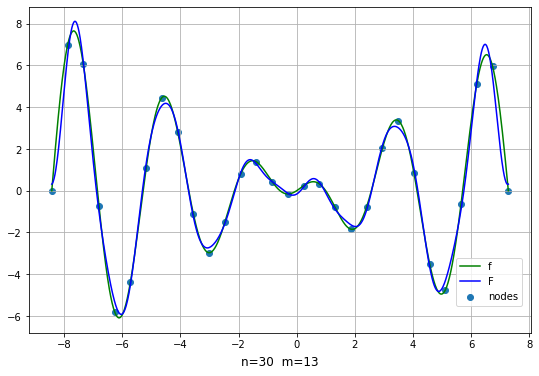

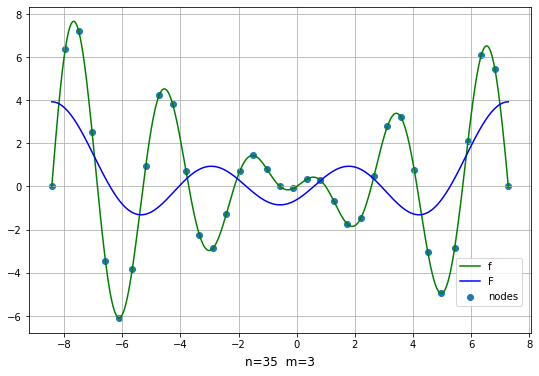

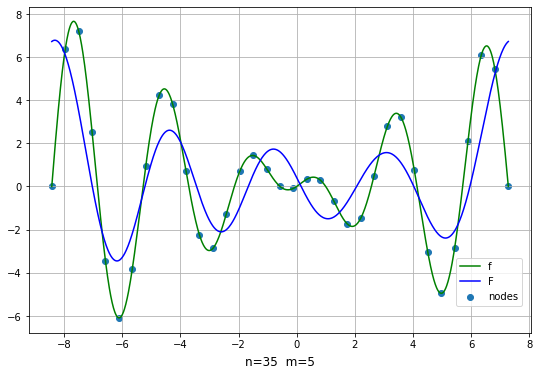

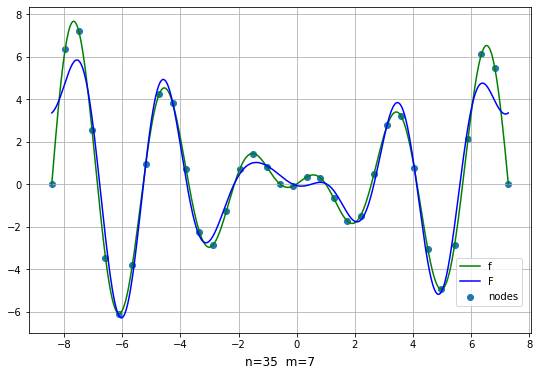

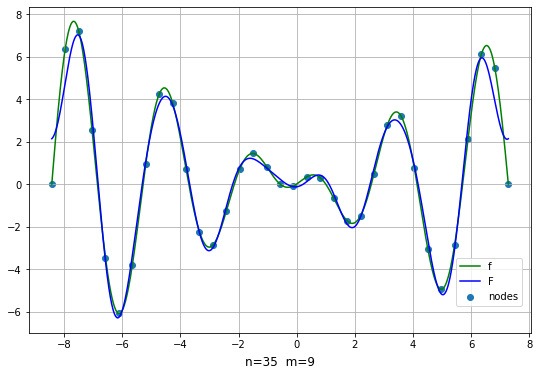

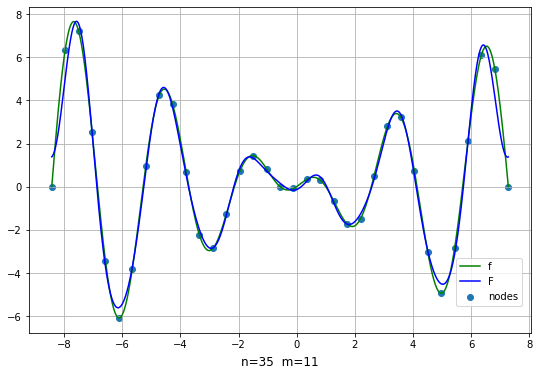

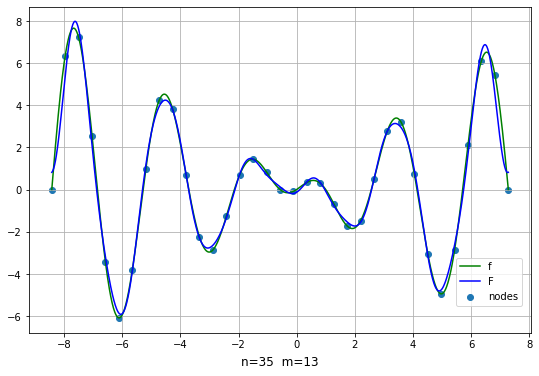

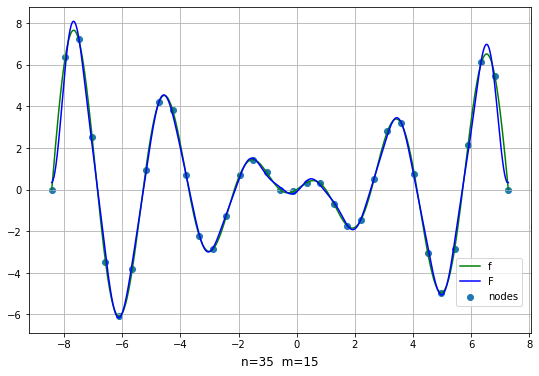

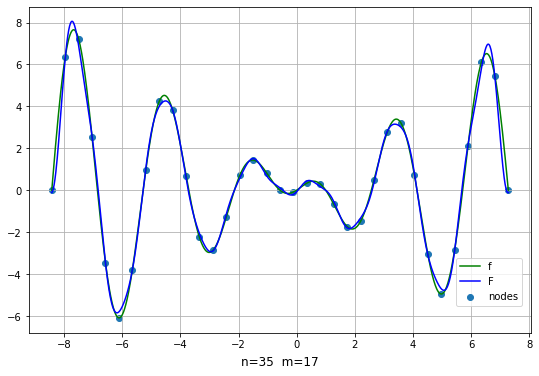

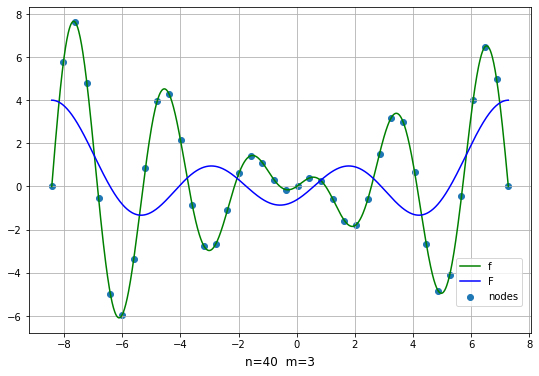

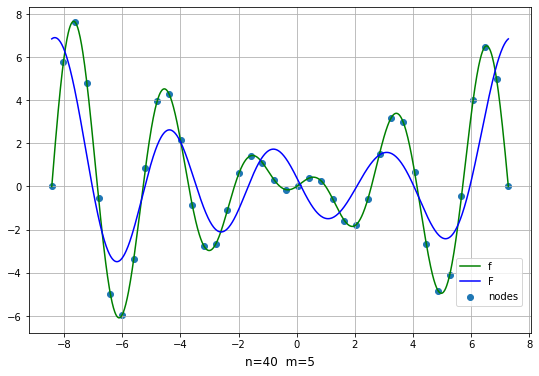

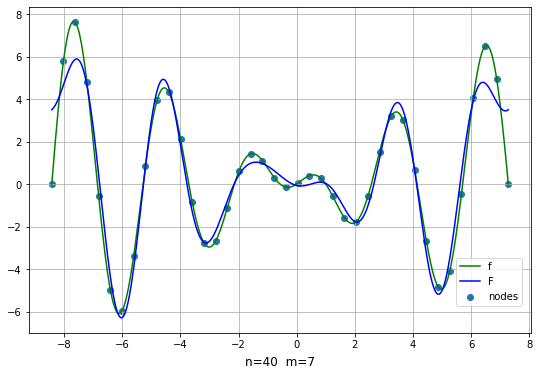

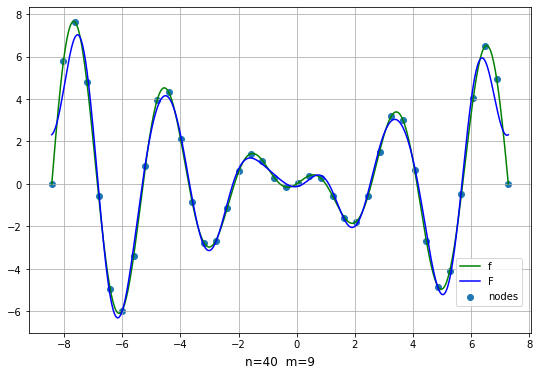

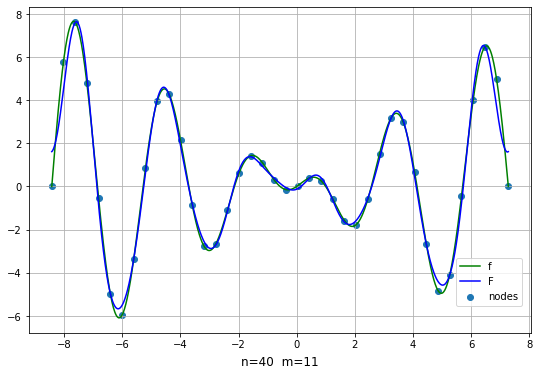

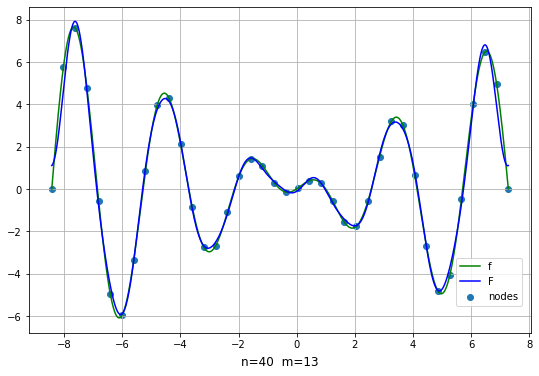

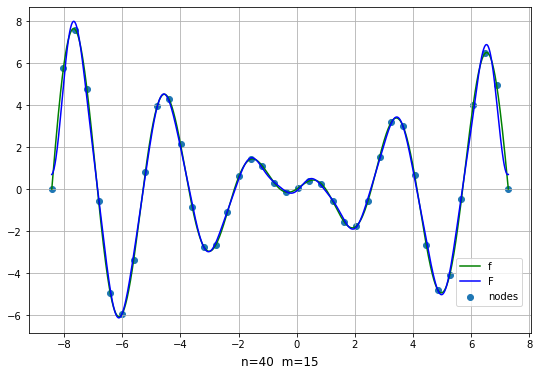

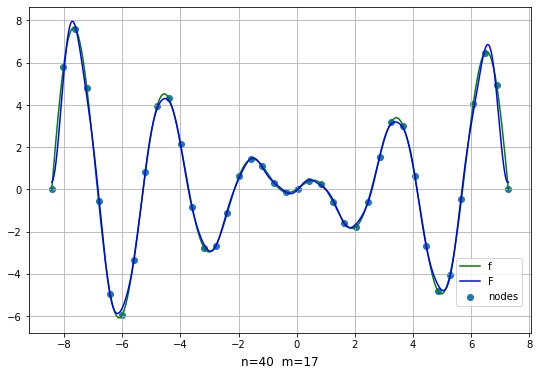

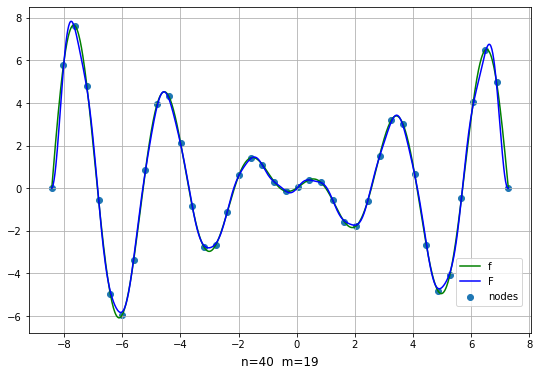

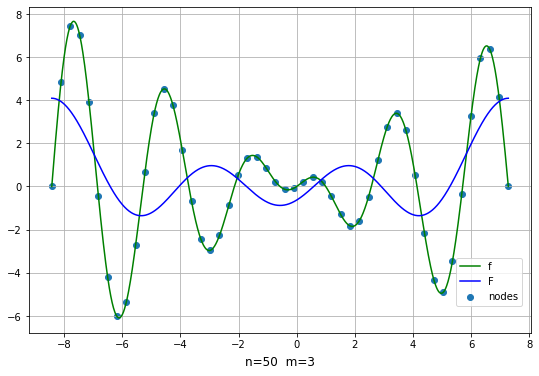

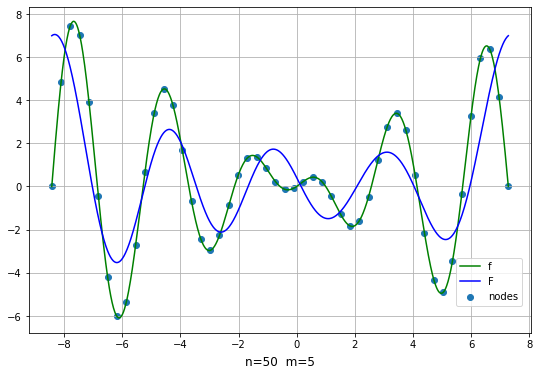

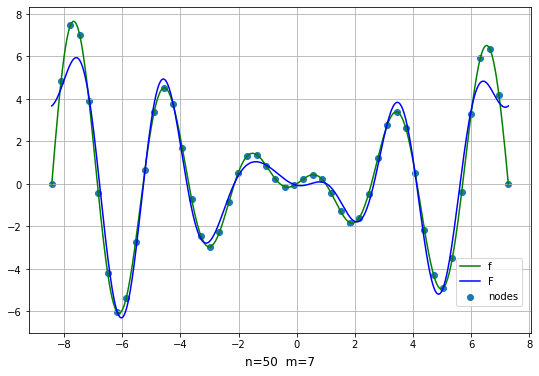

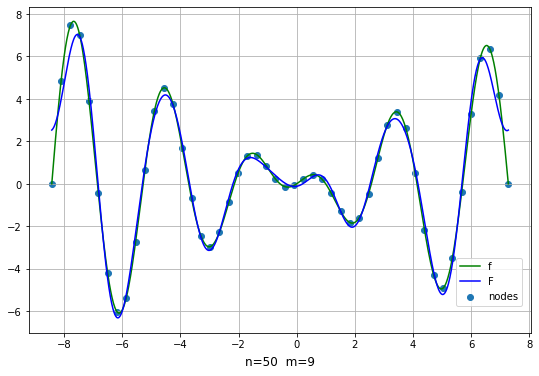

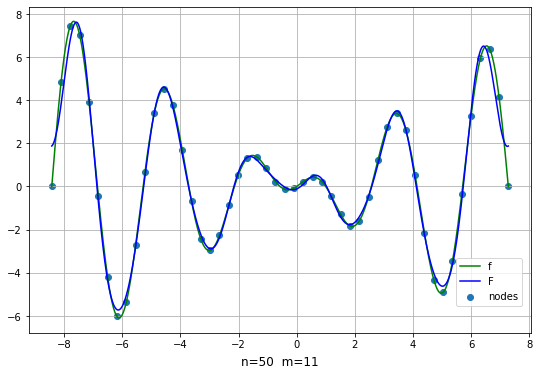

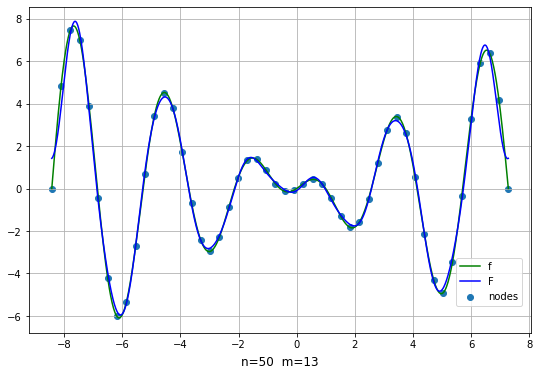

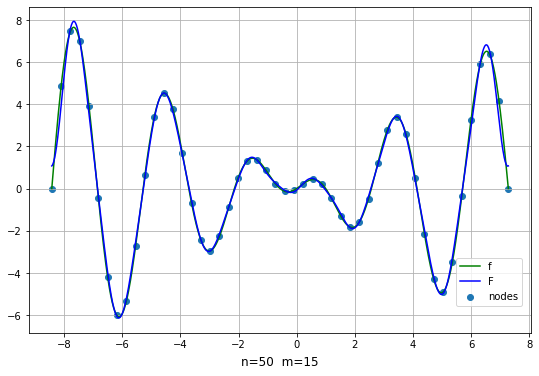

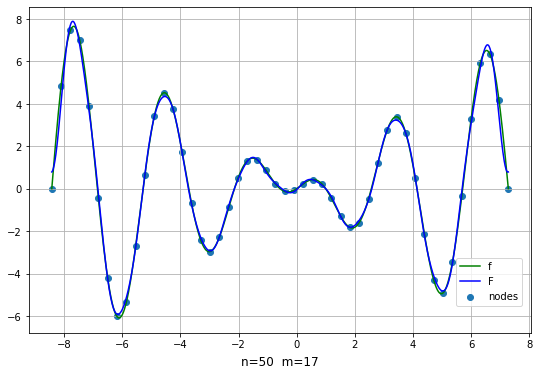

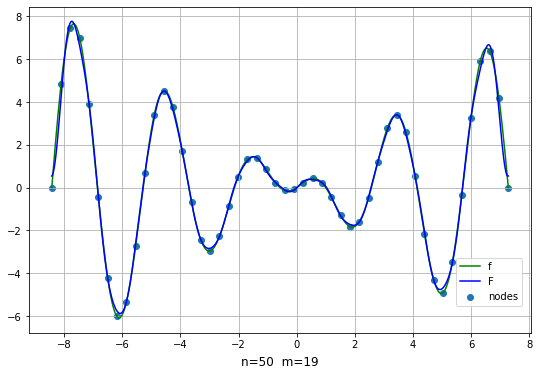

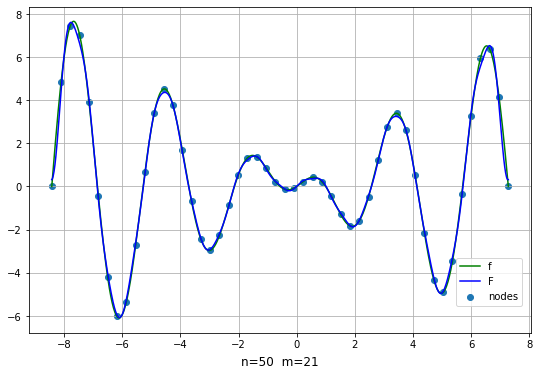

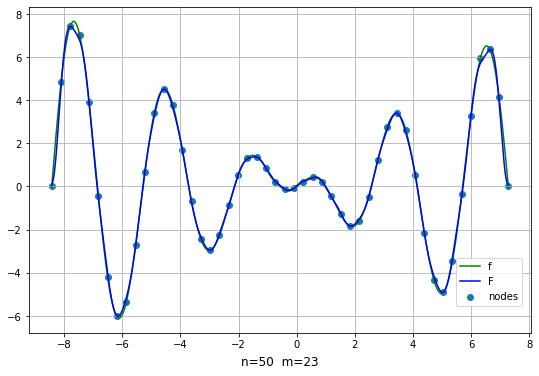

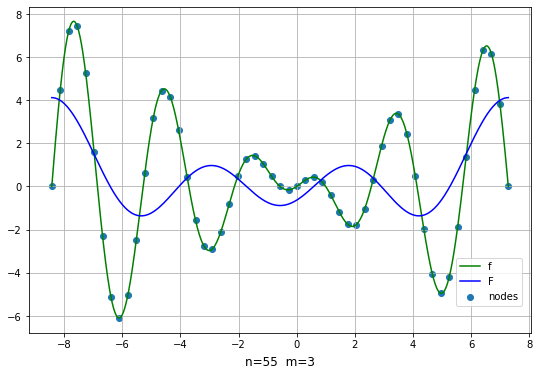

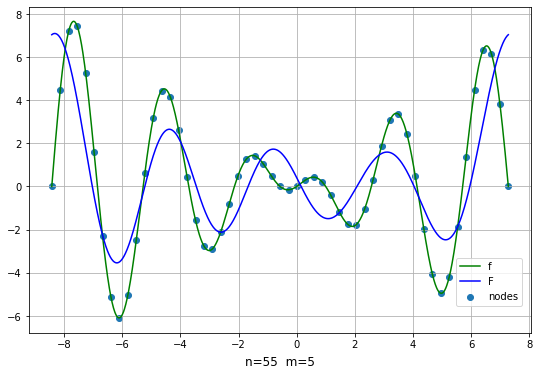

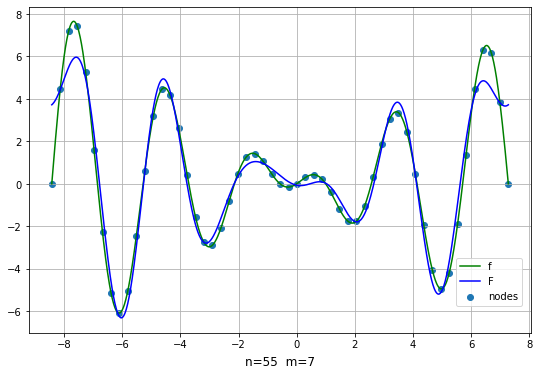

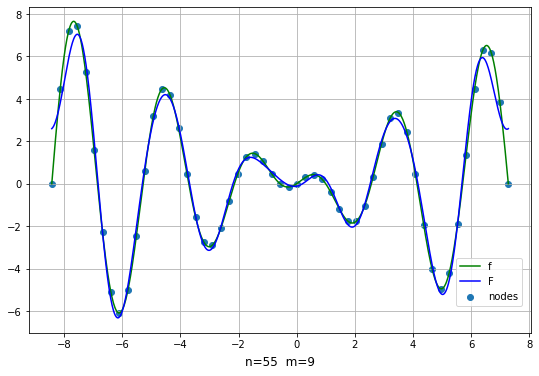

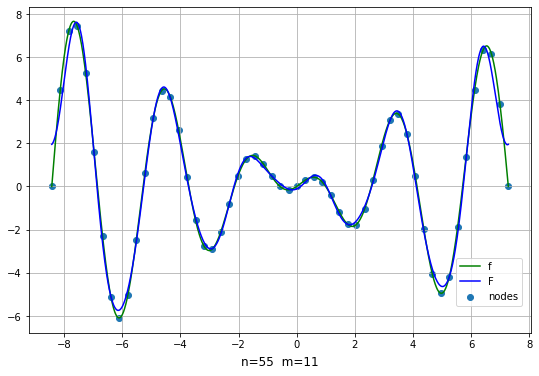

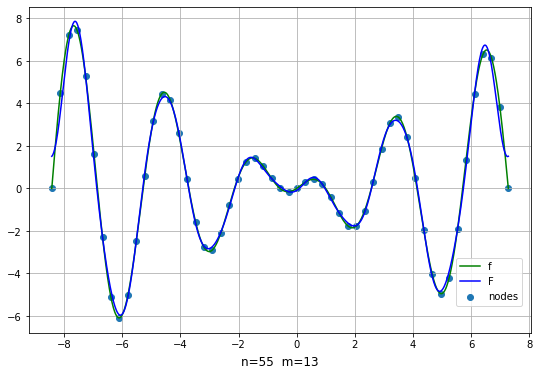

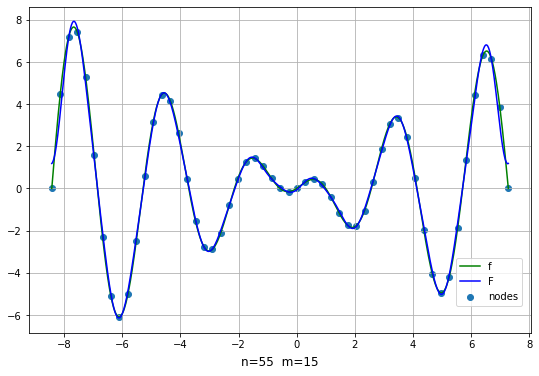

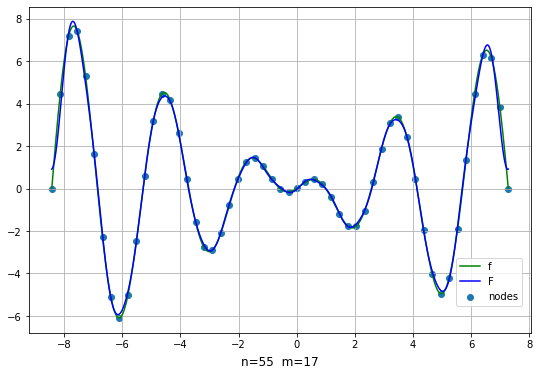

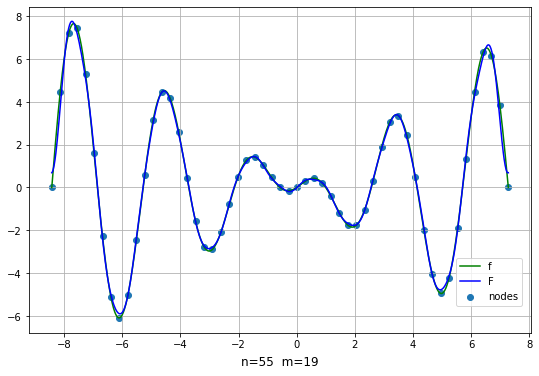

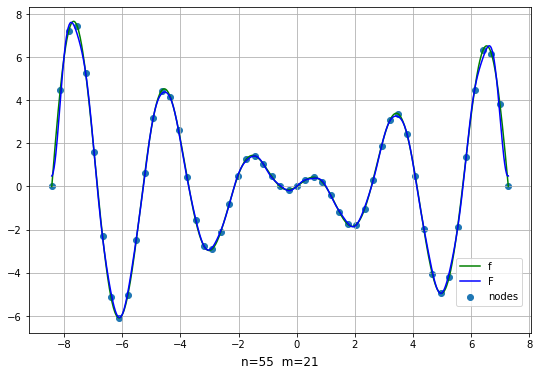

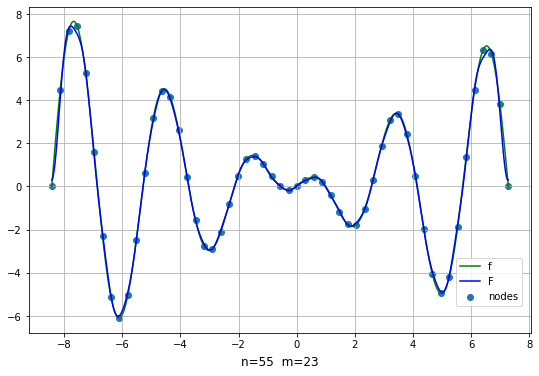

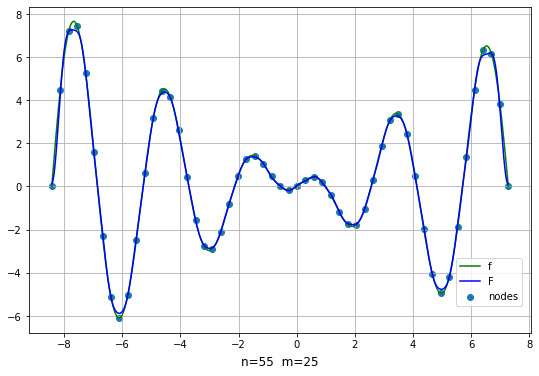

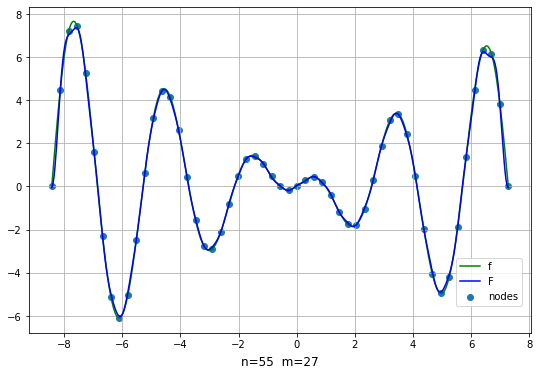

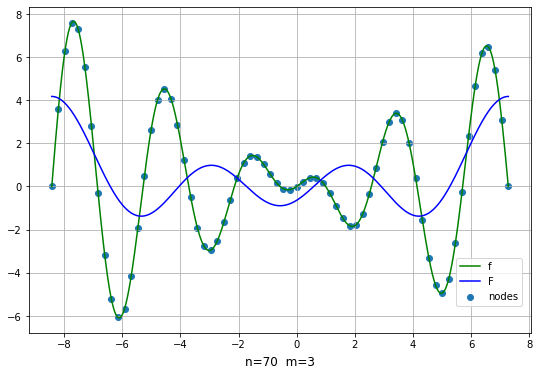

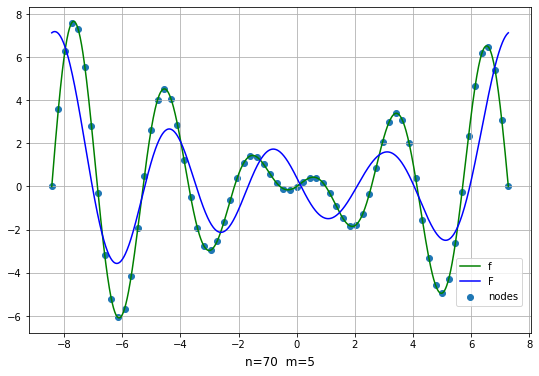

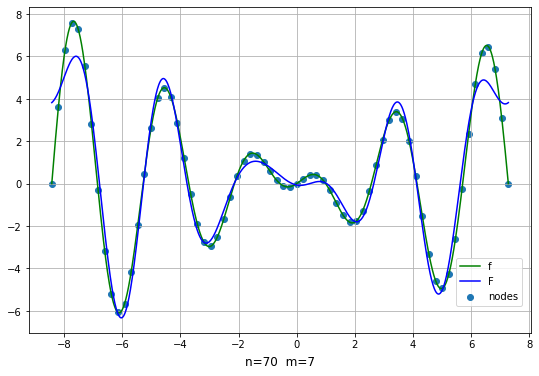

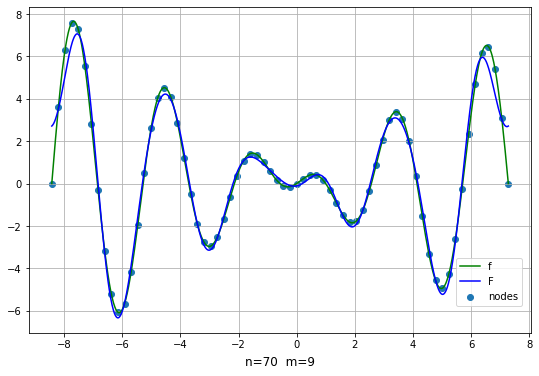

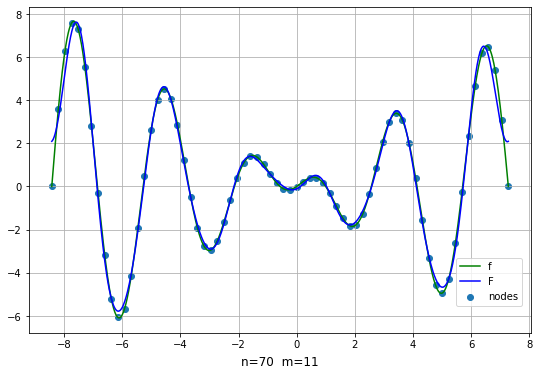

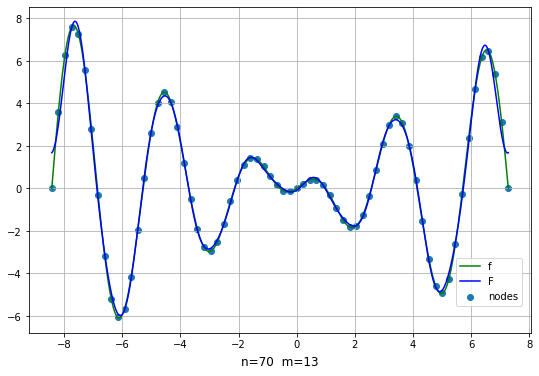

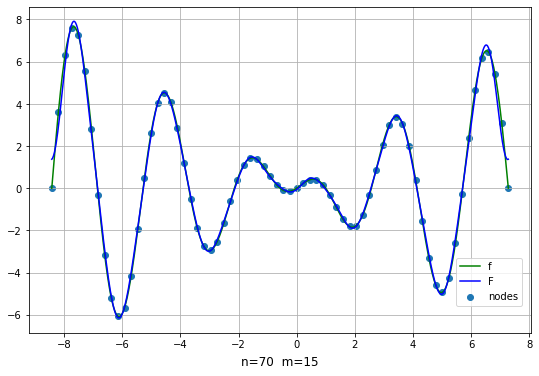

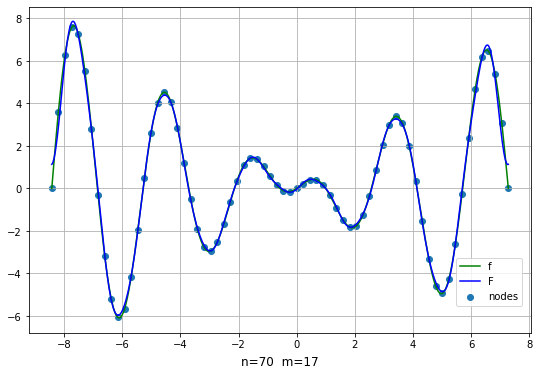

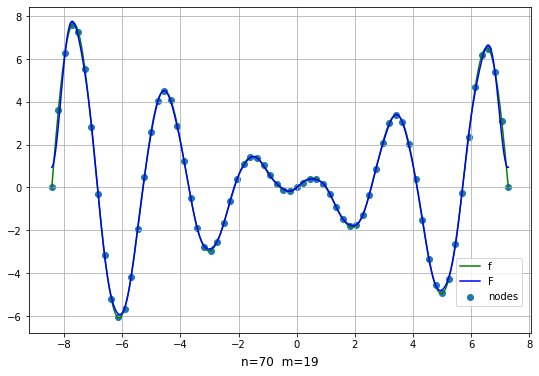

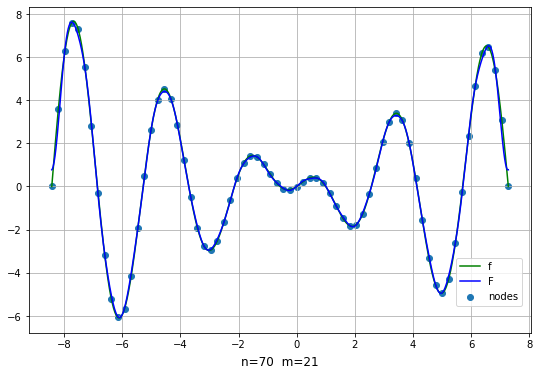

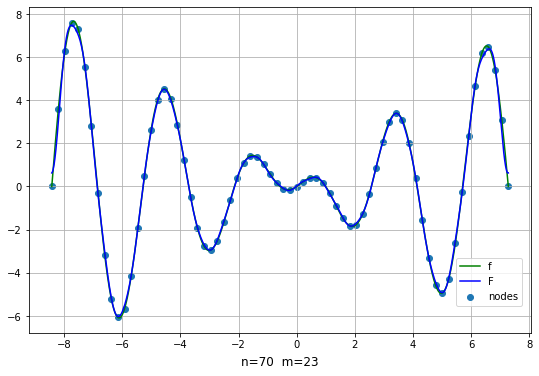

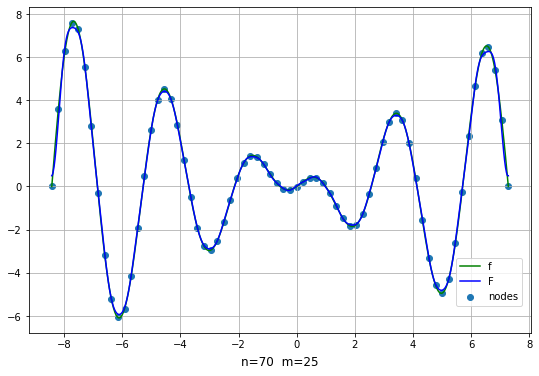

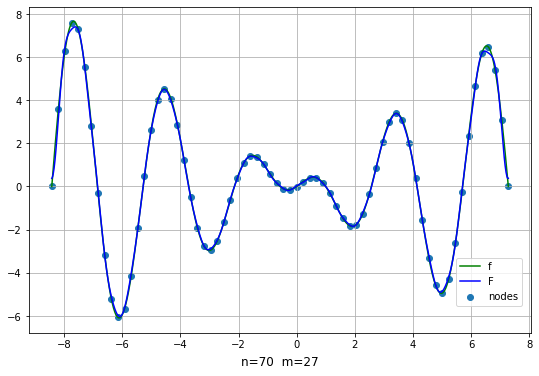

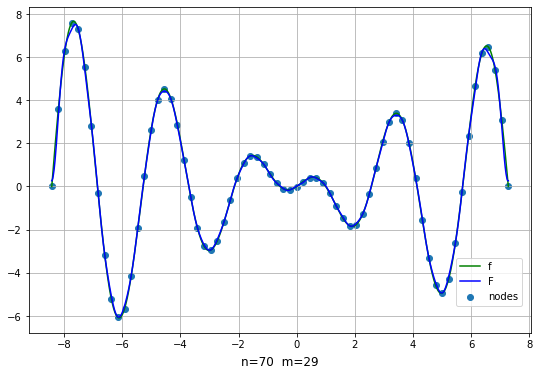

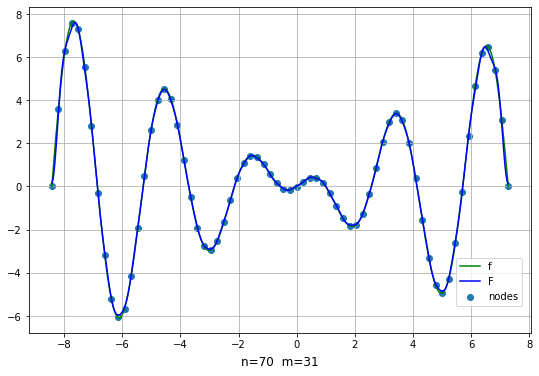

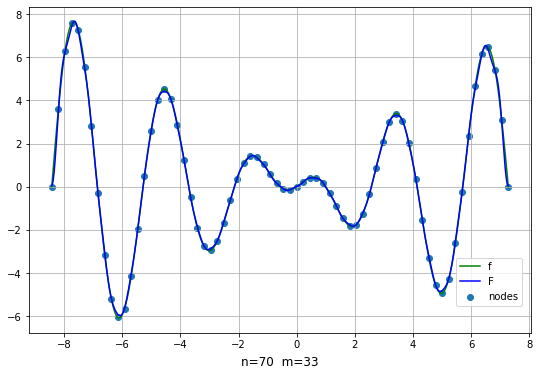

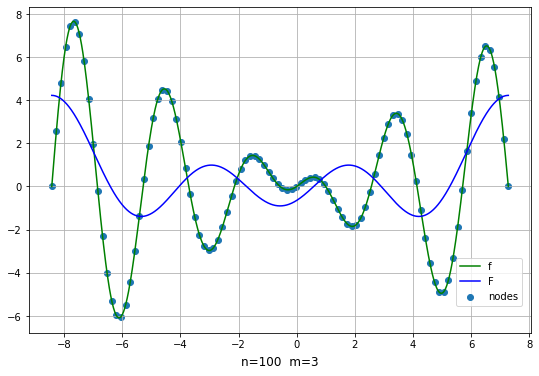

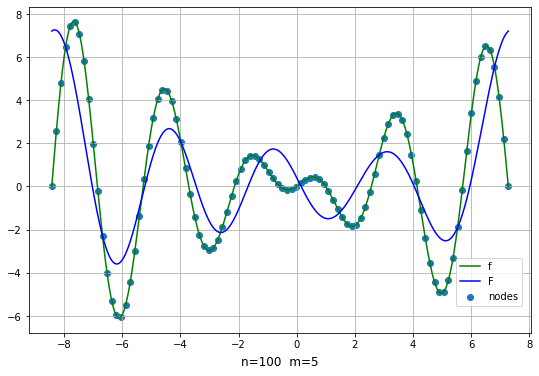

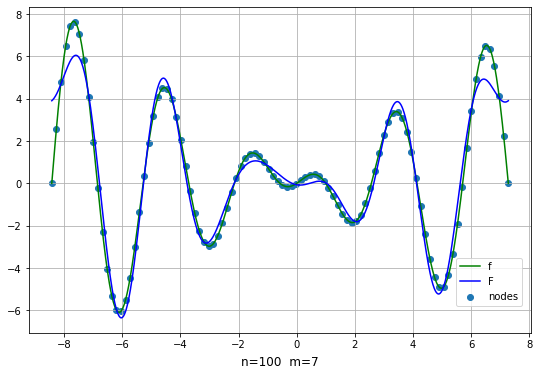

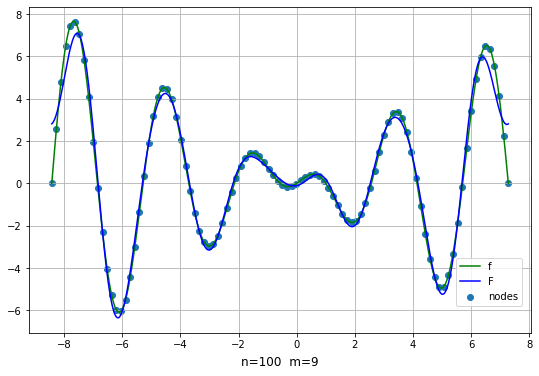

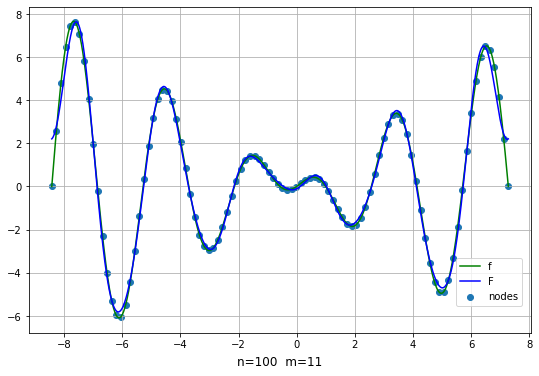

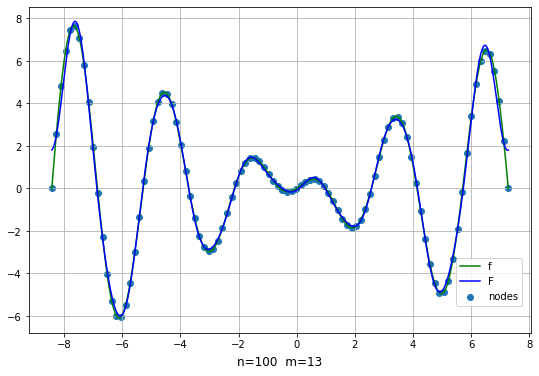

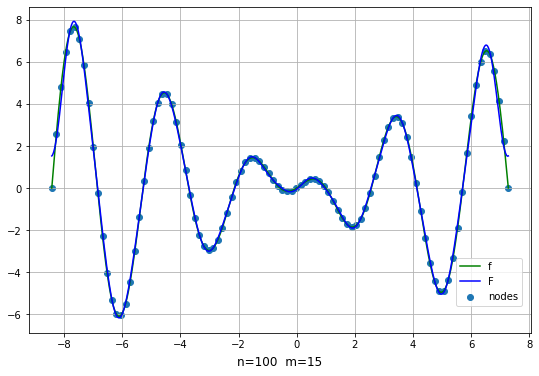

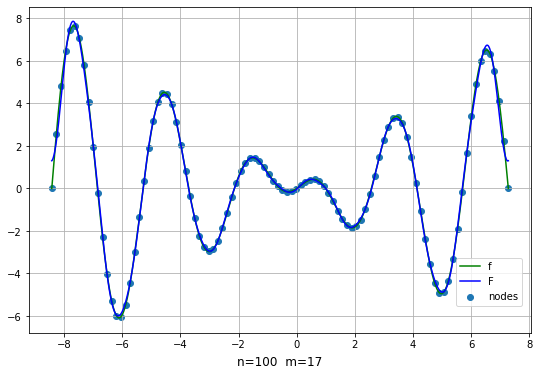

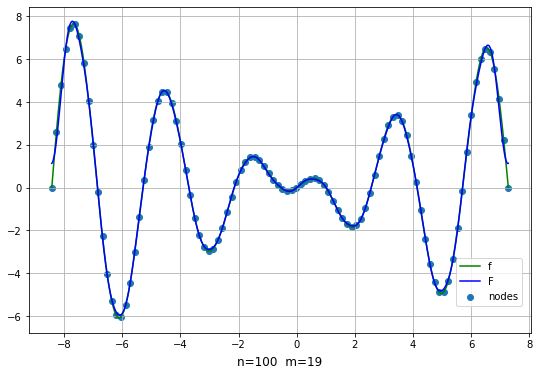

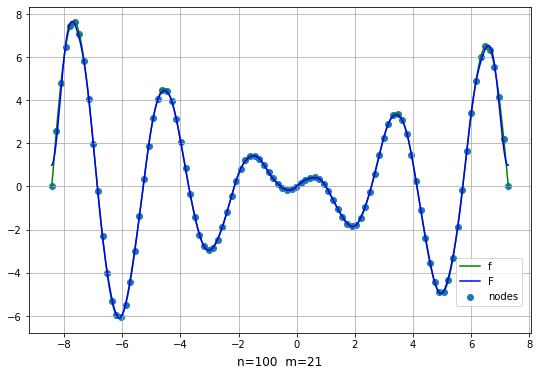

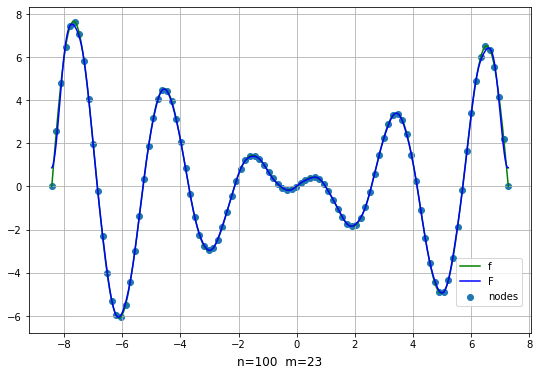

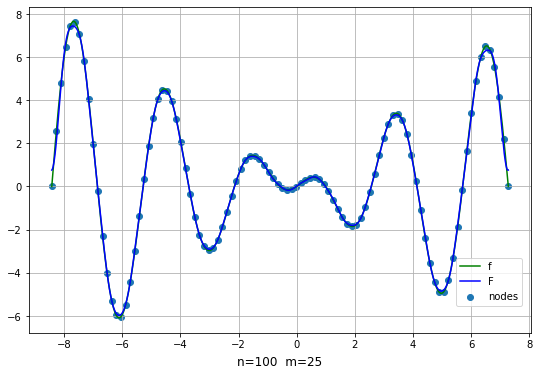

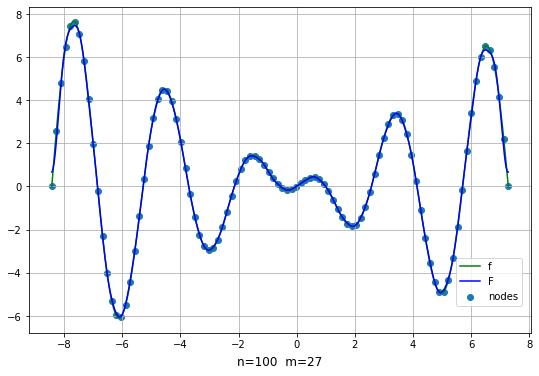

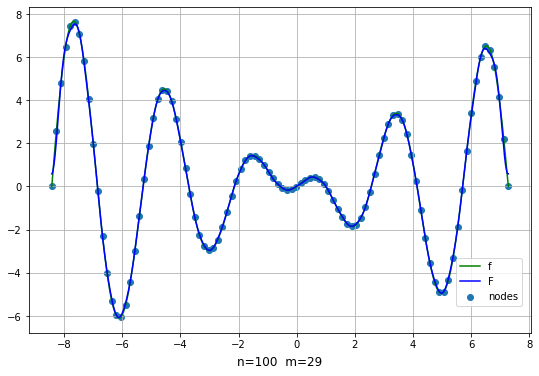

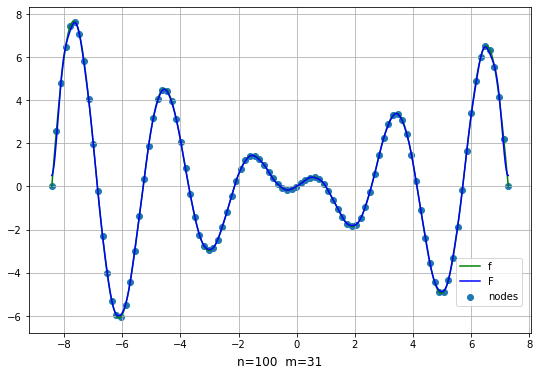

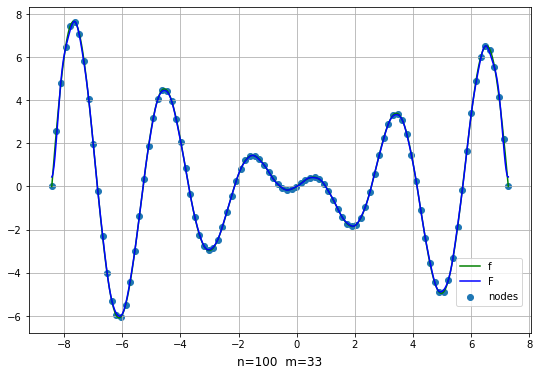

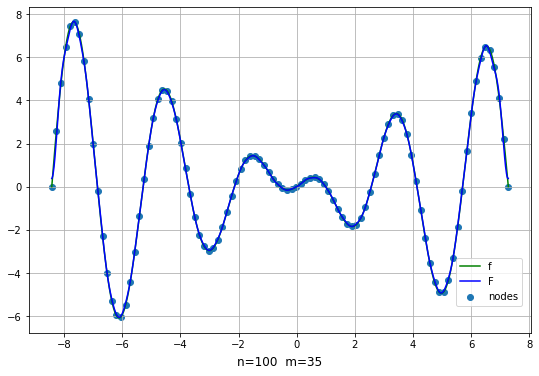

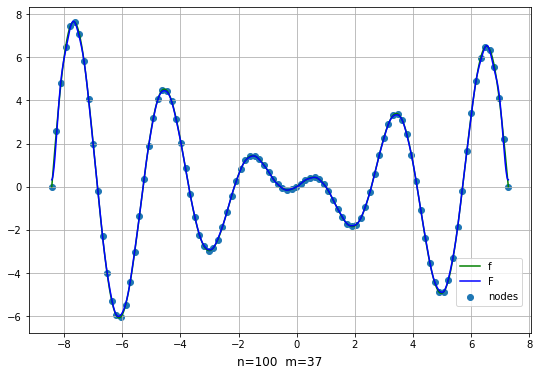

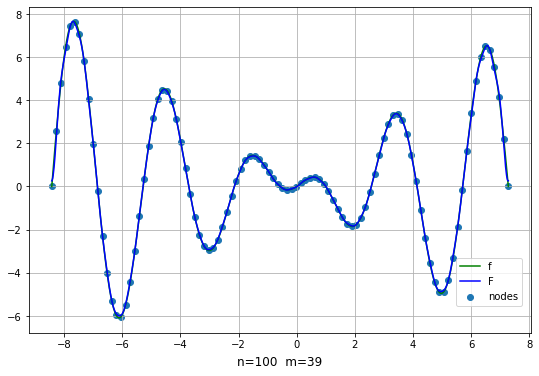

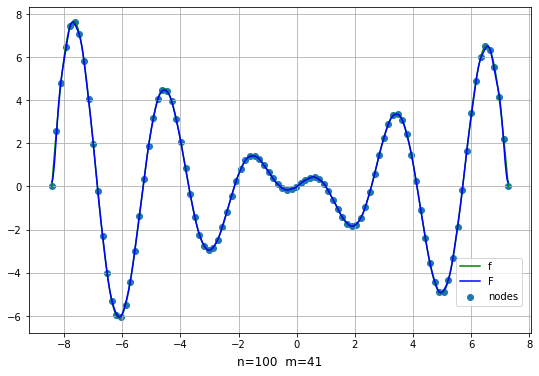

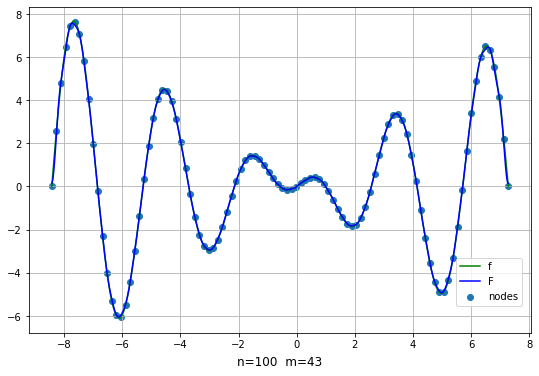

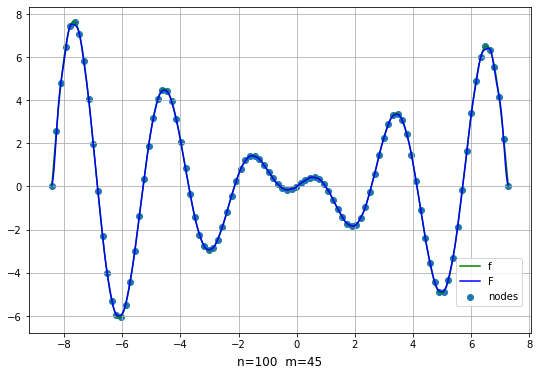

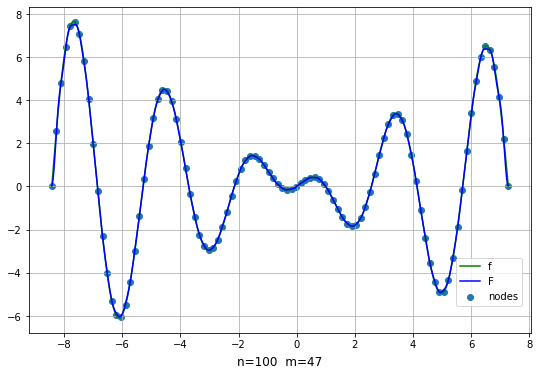

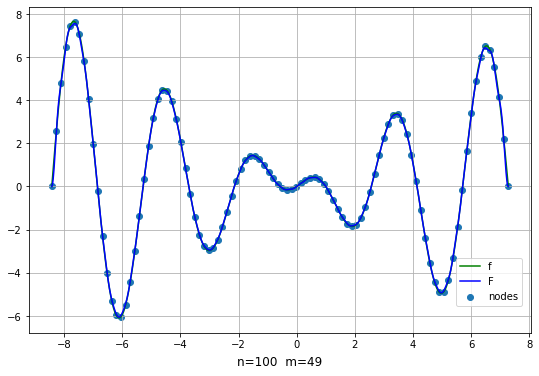

In [16]:
for n in [5, 7, 10, 12, 14, 18, 20, 23, 26,  30, 35, 40, 50, 55, 70, 100]:
    for m in range(3, math.floor((n-1)/ 2) + 1, 2):
        xs = np.linspace(a, b, n)
        ys = f(xs)


        ta = TrigonometricApproximation(m, xs, ys, a, b)
        F = ta.approximate    

        r = [n, m]
        r.append(get_norm(F(x_space), f(x_space), "sse"))
        r.append(get_norm(F(x_space), f(x_space), "max"))
        res.append(r)

        plot(x_space, [f, "f", "g-"], [F, "F", "b-"], points=[xs, f(xs)], title=f"n={n}  m={m}")
    

In [14]:
dataframe = pd.DataFrame(res)
dataframe.columns= ["n", "m", "SSE", "MAX"]
df = deepcopy(dataframe)

In [12]:
plt.rcParams['figure.figsize'] = [14, 6]
# for i in range(5):
#     plt.bar(dfm[i*11: (i+1) * (11)].idx, dfm[i*11: (i+1)*(11)].sse, label="SSE")
#     plt.bar(dfm[i*11: (i+1) * (11)].idx, dfm[i*11: (i+1)*(11)]['max'], label="MAX")
plt.bar(dfm.idx, dfm.sse, label="SSE")
plt.bar(dfm.idx, dfm['max'], label="MAX")
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)

plt.show()



NameError: name 'dfm' is not defined

In [ ]:
df[:29].to_csv("to29.csv")

In [ ]:
df[29:55].to_csv("to55.csv")

In [ ]:
df[57:86].to_csv("to86.csv")

In [ ]:
df.to_csv("Results.csv")